# Non Negative Matrix Factorization (NMF)

**Important Points:**

* NMF is another unsupervised learing algorithm that aims to extract useful features.
* In NMF, we want the components and coeffecients to be non-negative.
* NMF can be applied only of components and coeffecients are non negative(i.e. 0>=).
* PCA contains both negative and non negative coeffecients.
* NMF uses random initialization.

C:\Users\arman\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\arman\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


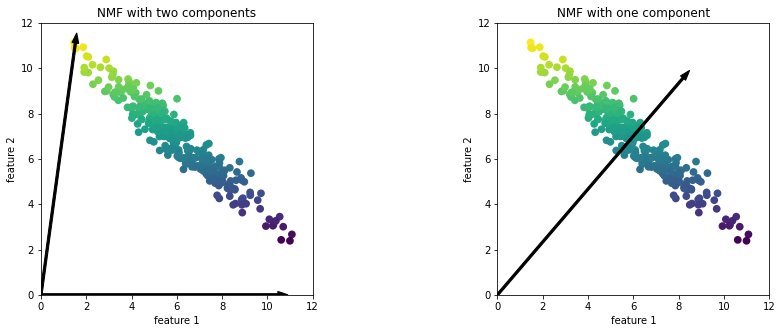

In [2]:
import mglearn

mglearn.plots.plot_nmf_illustration()

* Lets apply NMF to labeled faces in the wild dataset we used earlier.
* The main parameter ofNMF is how many components we want to extract.

In [4]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape


**NOTE**: NMF is only for finding patterns within the data.

In [9]:
import numpy as np

mask=np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people=people.data[mask]
y_people=people.target[mask]

#scale the grayscale values to be between 0 and 1
#instead of 0 and 255 for better numeric stability
X_people=X_people / 255

C:\Users\arman\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


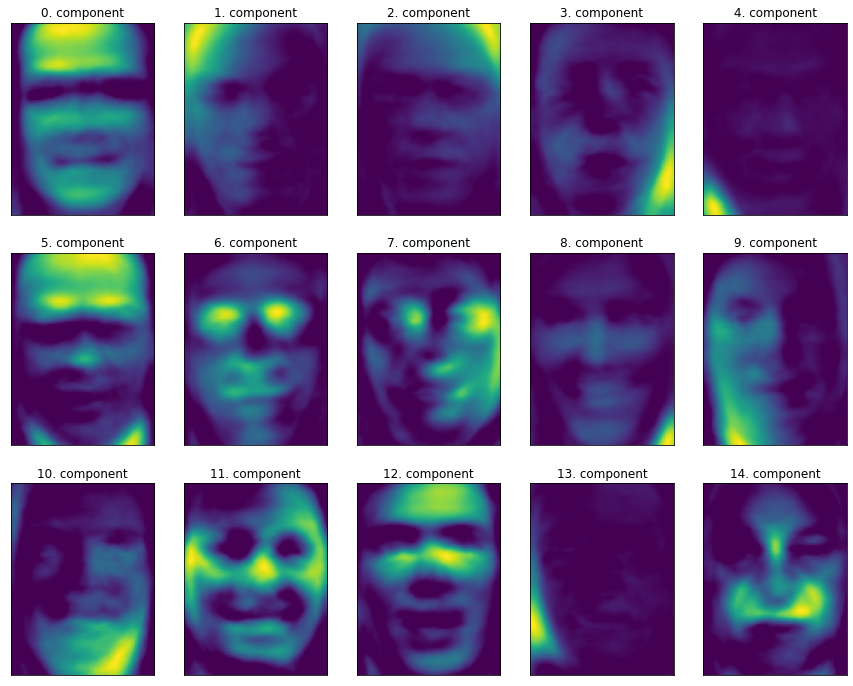

In [16]:
from sklearn.decomposition import NMF

X_train,X_test,y_train,y_test=train_test_split(X_people,y_people,stratify=y_people,random_state=0)
nmf=NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)

fig, axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i, (component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

* All the components are positive, one can clearly see that component 3 show face is rotated towards right and component 7 to the left.
* Lets find similar images by considering these 3rd and 7th component.

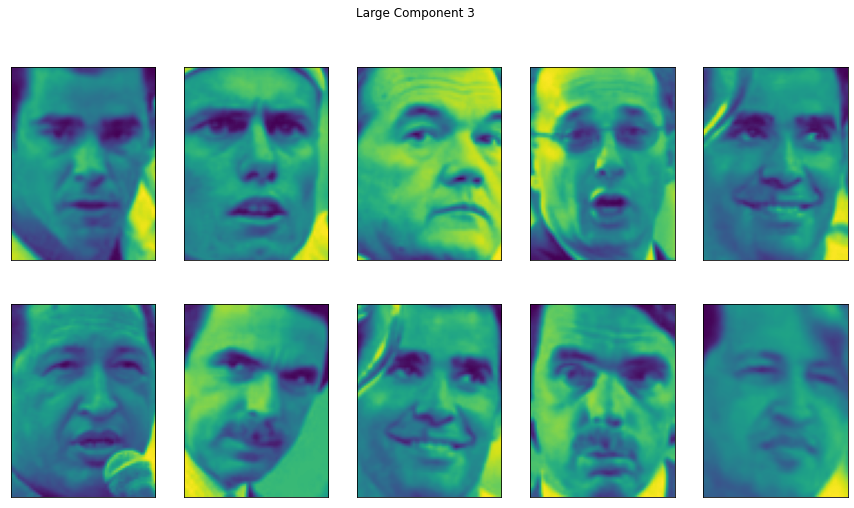

In [17]:
compn = 3
#sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})

fig.suptitle("Large Component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

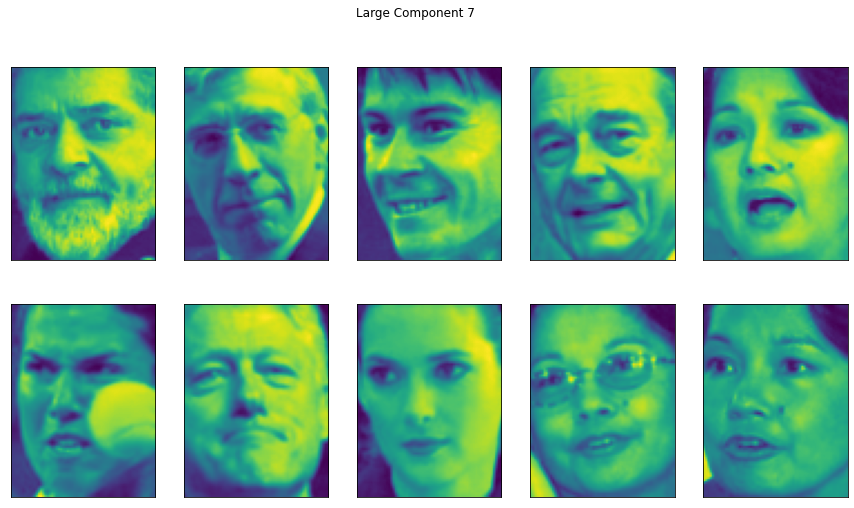

In [22]:
compn = 7
#sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})

fig.suptitle("Large Component 7")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

* As we can see the above components 3rd and 7th are the components considered to find similar position of a face from dataset
* Extracting patterns like these works best for data with audio, gene expression, and text data